<a href="https://colab.research.google.com/github/anyaiyer/melanoma-detection/blob/main/Skin_Cancer_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px
%matplotlib inline

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.6MB/s 
     |████████████████████████████████| 1.2MB 54.8MB/s 
     |████████████████████████████████| 194kB 67.9MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [5]:
from fastai import *

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
root_dir = "/content/gdrive/My Drive/Colab Notebooks/cancer_detection/"

In [8]:
label_info = pd.read_csv(f"{root_dir}/train.csv")
label_info.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [9]:
label_info['benign_malignant'].value_counts() # very unbalanced

benign       32542
malignant      584
Name: benign_malignant, dtype: int64

## Looking at the data

In [10]:
def label_func(fname):    
    label =  label_info.loc[label_info['image_name'] == fname.name[:-4]]['benign_malignant'].item()
    return label

In [11]:
path = Path("/content/gdrive/My Drive/Colab Notebooks/cancer_detection/train6")

In [12]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(valid_pct=0.1,seed=42),
                   batch_tfms=aug_transforms(), 
                   item_tfms = Resize(224))

In [13]:
dls = dblock.dataloaders(path)  

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning:

torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)



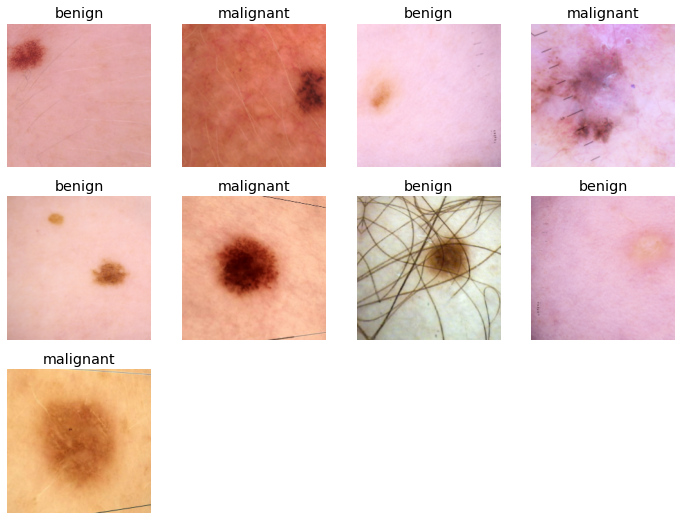

In [14]:
dls.show_batch(nrows=3, ncols=4) # data looks correct

## Exploratory Data Analysis

In [15]:
label_info['sex'].value_counts() # fairly balanced

male      17080
female    15981
Name: sex, dtype: int64

In [16]:
label_info['age_approx'].value_counts() # most patients are 45 years old

45.0    4466
50.0    4270
55.0    3824
40.0    3576
60.0    3240
35.0    2850
65.0    2527
30.0    2358
70.0    1968
25.0    1544
75.0     981
20.0     655
80.0     419
85.0     149
15.0     132
90.0      80
10.0      17
0.0        2
Name: age_approx, dtype: int64

In [17]:
label_info['diagnosis'].value_counts() 

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [18]:
label_info['anatom_site_general_challenge'].value_counts() # most common area is torso

torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

In [19]:
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



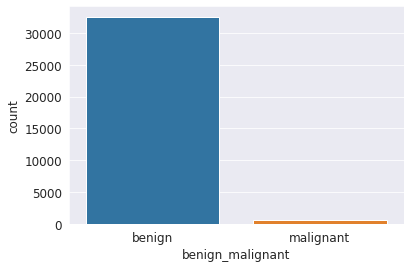

In [20]:
sns.countplot(label_info['benign_malignant'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



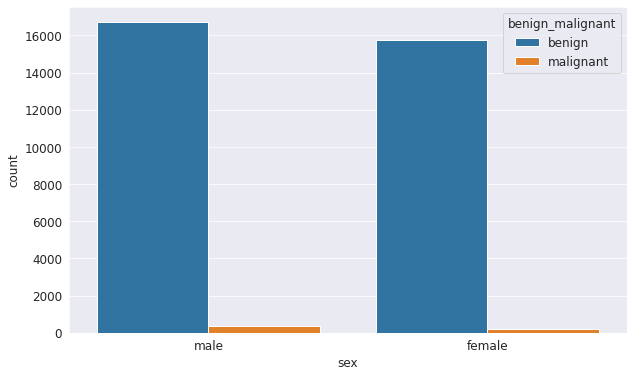

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(label_info['sex'],hue=label_info['benign_malignant'])

There are fewer females in the dataset than males, however the number of males vs. females is fairly balanced. 

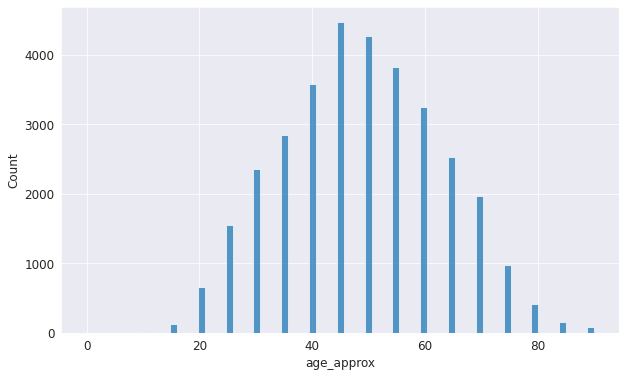

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(x=label_info['age_approx'])

This shows the distribution of ages. Most people with cancer tend to be around 40 - 60 years old with 45 being the most common.

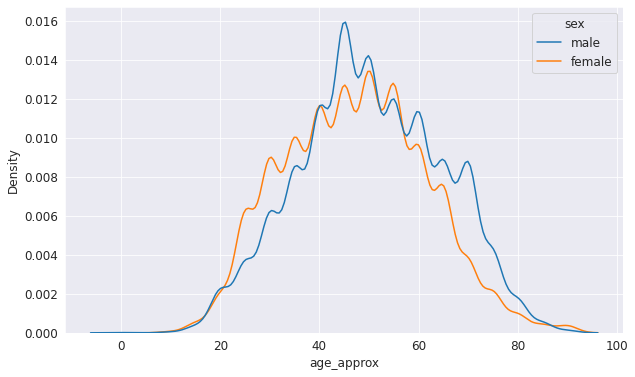

In [24]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=label_info['age_approx'],hue=label_info['sex'])

More females tend to develop skin cancer at a slightly earlier age than males. The most common age among males is about 50 years old, while the most common age among females is about 45 years old.

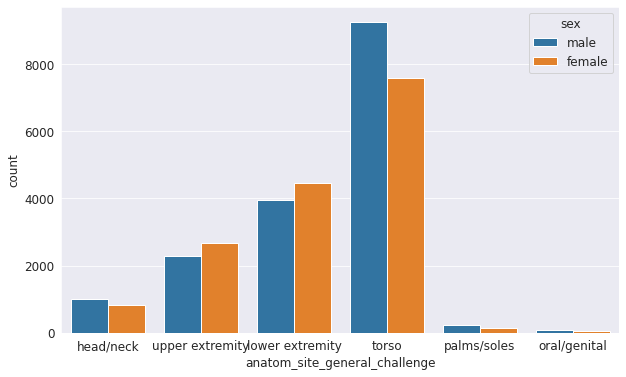

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x=label_info['anatom_site_general_challenge'],hue=label_info['sex']) # most

More males have skin cancer on the torso area as opposed to females. Slightly more females have skin cancer in the lower and upper extremity areas than males. 

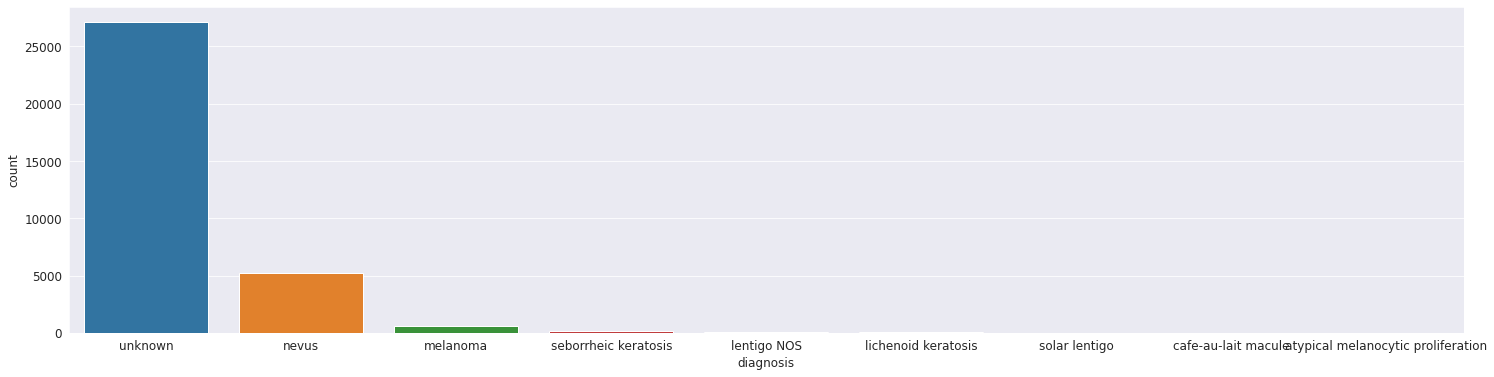

In [26]:
plt.figure(figsize=(25,6))
plt.tight_layout()
sns.countplot(x=label_info['diagnosis'])

Other than unknown, nevus is the most common diagnosis for patients. All diagnoses except melanoma are benign. 

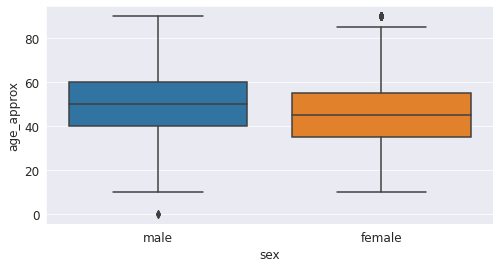

In [27]:
plt.figure(figsize=(8,4))
sns.boxplot(x="sex", y="age_approx", data=label_info)
plt.show()

The average age of developing cancer for females ( ~ 45 years old) is lower than the average for males (~ 50 years old). In addition, the age range for males is larger than for females.

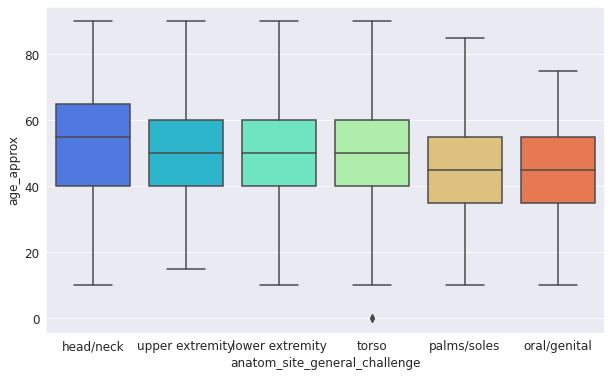

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x="anatom_site_general_challenge", y="age_approx", data=label_info,palette='rainbow')
plt.show()

People develop skin cancer on their oral/genital and palms/sores area at an earlier age than the rest of the areas.

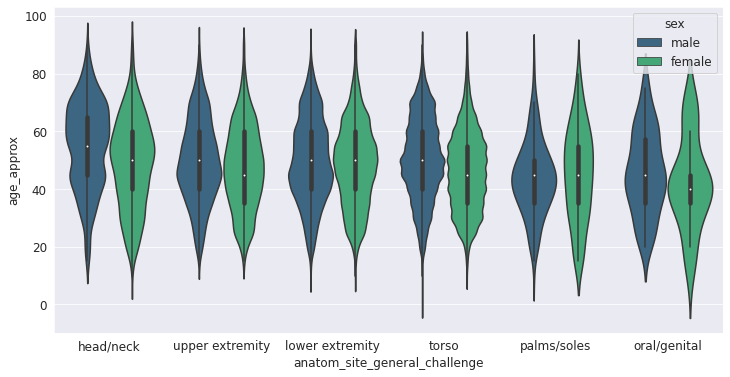

In [29]:
plt.figure(figsize=(12,6))
sns.violinplot(x="anatom_site_general_challenge", y="age_approx", data=label_info, hue='sex',palette='viridis')

Across the different areas for developing skin cancer, we can once again observe that females either develop skin cancer earlier or at the same age as males. In addition, the torso area for males and the oral/genital area for females have the most age variance.

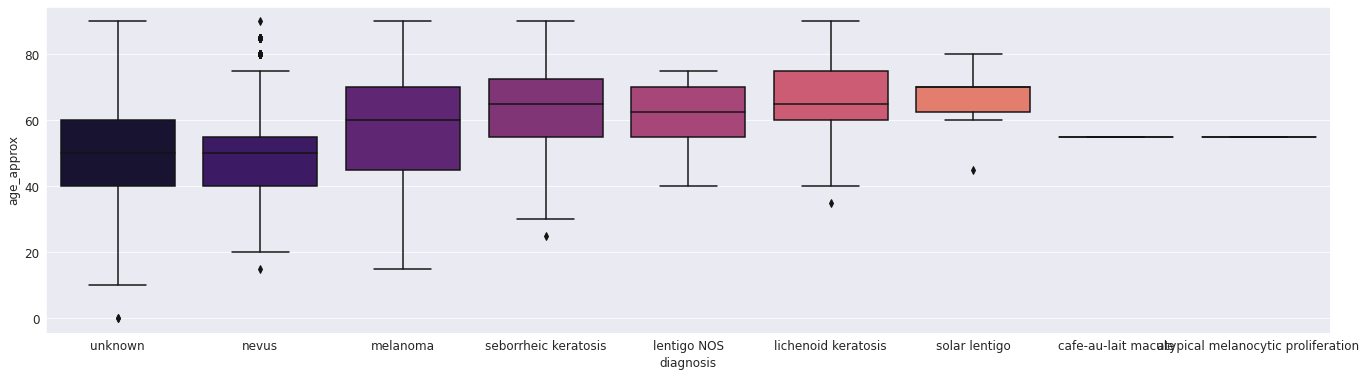

In [30]:
plt.figure(figsize=(23,6))
plt.tight_layout()
sns.boxplot(x="diagnosis", y="age_approx", data=label_info,palette='magma')
plt.show()

On average, nevus takes the earliest develop (nevus is present at an earlier age than other types of skin cancer). On average, melanoma develops at age 60. 

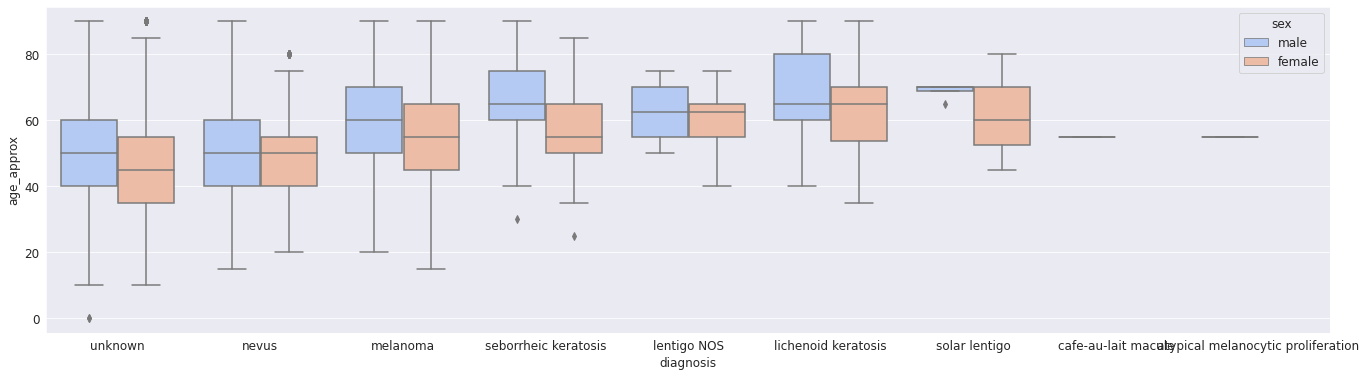

In [31]:
plt.figure(figsize=(23,6))
plt.tight_layout()
sns.boxplot(x="diagnosis", y="age_approx", data=label_info,palette = 'coolwarm',hue='sex')
plt.show()

The is a more varied age range for females with solar lentigo than males with solar letigo. On average, females develop melanoma at an earlier age than males. Females appear to have a more varied age range for certain skin cancer types, other than nevus. Lichenoid keratosis is prevalent in older people. 